<a href="https://colab.research.google.com/github/agnesnababanMl-80/-volunter-pembuatan-aplikasi/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyek Akhir Analisis Data **

Berdasarkan Materi dan Latihan dari:

1. Dasar-Dasar Analisis Data
2. Penerapan Dasar-Dasar Descriptive Statistics
3. Petimbangan dalam Pengolahan Data
4. Data Wrangling
5. Exploratory Data Analysis
6. Data Visualization
7. Pengembangan Dashboard

Dataset yang saya gunakan:

*   Bike Sharing Dataset



Pertanyaan Bisnis
1. Apakah terdapat pola khusus dalam penggunaan layanan berdasarkan status pendaftaran di berbagai hari dalam minggu?
2. Bagaimana kinerja bulan (mnth_x) dan jam kerja (hr) berbeda antara hari kerja dan akhir pekan?
3. Bagaimana pengaruh variabel temperatur dan musim terhadap jumlah penyewaan sepeda, dan bagaimana kita bisa mengoptimalkan layanan berdasarkan faktor-faktor dalam data ini?

Untuk menjawabnya kita perlu membuat grupby terlebih dahulu lalu memvisualisasikannya.

Pada Visualisasi 1 yaitu jawaban pertanyaan bisnis 1,saya menggunakan barplot.Barplot ini memberikan wawasan berharga mengenai bagaimana pengguna berinteraksi dengan layanan berdasarkan status pendaftaran dan hari dalam minggu. Dengan informasi ini, perusahaan dapat lebih baik dalam merencanakan strategi pemasaran, meningkatkan layanan, dan mengoptimalkan pengalaman pengguna.

Pada Visualisasi Pertanyaan yang ke-2 yang ditampilkan adalah sebagai berikut.

Grafik menunjukkan hubungan antara hari dalam minggu (0-6, dimana 0 = Minggu, 6 = Sabtu) dengan nilai mnth_x, yang dikelompokkan berdasarkan workingday_y (0 = hari libur, 1 = hari kerja).
Pola yang terlihat:

Hari 2 dan 3 (Selasa dan Rabu) menunjukkan nilai mnth_x tertinggi, baik untuk hari kerja maupun hari libur
Hari 0, 1, 4, 5, dan 6 (Minggu, Senin, Kamis, Jumat, Sabtu) menunjukkan nilai mnth_x yang relatif konsisten
Tidak ada perbedaan signifikan antara hari kerja (1.0) dan hari libur (0.0) untuk kebanyakan hari

Visualisasi pertanyaan ke 3
Kesimpulan umum dari heatmap korelasi:

Hubungan antara variabel target:

cnt memiliki korelasi positif kuat dengan registered dan casual
Ini menunjukkan bahwa total penyewaan sepeda dipengaruhi oleh kedua jenis pengguna

Pengaruh cuaca:

temp (temperatur) biasanya memiliki korelasi positif dengan jumlah penyewaan
windspeed mungkin memiliki korelasi negatif, menunjukkan angin kencang mengurangi penyewaan

Pola musiman:

Variabel seperti season dan yr mungkin menunjukkan korelasi dengan jumlah penyewaan
Ini mengindikasikan adanya tren musiman dan tahunan.Demikian jawaban dari pertanyaan bisnis

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gathering Data
# Baca dataset day
day_df = pd.read_csv('day.csv', delimiter=';')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,00.02,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,"1,297916667",82,1518,1600


In [3]:
# Baca dataset hour
hour_df = pd.read_csv('hour.csv', delimiter=';')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,00.24,"1,999305556","0,05625",0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,00.22,"1,89375",00.08,0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,00.22,"1,89375",00.08,0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,00.24,"1,999305556","0,052083333",0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,00.24,"1,999305556","0,052083333",0,0,1,1


In [4]:
#Assesing Data
#Menilai Data Day.
#Data pertama yang akan kita nilai adalah day_df. Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     731 non-null    int64 
 1   dteday      731 non-null    object
 2   season      731 non-null    int64 
 3   yr          731 non-null    int64 
 4   mnth        731 non-null    int64 
 5   holiday     731 non-null    int64 
 6   weekday     731 non-null    int64 
 7   workingday  731 non-null    int64 
 8   weathersit  731 non-null    int64 
 9   temp        731 non-null    object
 10  atemp       731 non-null    object
 11  hum         731 non-null    object
 12  windspeed   731 non-null    object
 13  casual      731 non-null    int64 
 14  registered  731 non-null    int64 
 15  cnt         731 non-null    int64 
dtypes: int64(11), object(5)
memory usage: 91.5+ KB


In [5]:
#Kode di bawah ini akan menampilkan informasi terkait jumlah missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,3410.000000,6946.000000,8714.000000


In [7]:
#Menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  int64 
 3   yr          17379 non-null  int64 
 4   mnth        17379 non-null  int64 
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  int64 
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  int64 
 9   weathersit  17379 non-null  int64 
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  int64 
 15  registered  17379 non-null  int64 
 16  cnt         17379 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 2.3+ MB


In [8]:
#Memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,367.000000,886.000000,977.000000


In [9]:
day_df.drop_duplicates(inplace=True)

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
#Memeriksa parameter statistik, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.)
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499,690,595,650,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,440972222",0.654688,0.613333,0.134954,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,3,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,NaN,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,NaN,NaN,NaN,NaN,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000


In [12]:
#Exploratory Data Analysis
#Eksplorasi Data Day
#Analisis Musim (season).Melihat berapa kali data unik (jumlah rekaman unik di instant) terjadi di setiap musim, serta statistik dari yr (tahun) di musim tersebut.
#Statistik max, min, mean, dan std menunjukkan distribusi data dalam setiap musim.
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"]
})

instant  yr                        
       nunique max min      mean       std
season                                    
1          181   1   0  0.502762  0.501379
2          184   1   0  0.500000  0.501364
3          188   1   0  0.500000  0.501335
4          178   1   0  0.500000  0.501410

In [13]:
#Kode ini bertujuan untuk menganalisis perbedaan penggunaan sepeda berdasarkan musim dan tipe pengguna (casual dan registered)

day_df.groupby(by="casual").yr.nunique().sort_values(ascending=False)
day_df.groupby(by="registered").yr.nunique().sort_values(ascending=False)

,yr
registered,
3425,2
4429,2
3946,2
2115,2
2713,2
...,...
2993,1
3019,1
3040,1


In [14]:
#Eksplorasi Data Hour
#Menghitung Pengguna Tanpa Membership:nonmembership menghitung jumlah pengguna sepeda yang tidak terdaftar sebagai pengguna terdaftar (cnt - registered).
#Kolom cnt berisi total pengguna sepeda, dan registered berisi jumlah pengguna terdaftar. Hasilnya disortir dalam urutan menurun untuk melihat nilai tertinggi terlebih dahulu.
nonmembership = hour_df["cnt"] - hour_df["registered"]
nonmembership.sort_values(ascending=False)

,0
10477,367
15343,362
11985,361
10476,357
11986,356
...,...
1484,0
11113,0
10008,0
9198,0


In [15]:
#Menampilkan statistik deskriptif untuk semua kolom dalam hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,64,88,30,NaN,NaN,NaN
top,NaN,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,043055556","4,313888889","0,061111111",0,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726,988,657,2180,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,NaN,NaN,NaN,NaN,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000


In [16]:
#kolom baru status ditambahkan ke day_df. Nilai status akan menjadi "Yes" jika nilai yr dalam day_df juga terdapat di day_id_in_hour_df, dan "No" jika tidak ada.
day_id_in_hour_df =  hour_df.yr.tolist()
day_df["status"] = day_df["yr"].apply(lambda x: "Yes" if x in day_id_in_hour_df else "No")
day_df.head()
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
335,336,02/12/2011,4,0,12,0,5,1,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940,Yes
202,203,22/07/2011,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,"0,924305556",562,2825,3387,Yes
3,4,04/01/2011,1,0,1,0,2,1,1,00.02,0.212122,0.590435,0.160296,108,1454,1562,Yes
725,726,26/12/2012,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441,Yes
320,321,17/11/2011,4,0,11,0,4,1,2,0.341667,0.323221,0.575833,0.305362,139,2914,3053,Yes


In [17]:
#Menampilkan total kolom status
day_df.groupby(by="status").yr.count()

,yr
status,
Yes,731


In [18]:
#Kode ini melakukan merge atau penggabungan dua dataframe (hour_df dan day_df)
#Menggabungkan dua dataframe berdasarkan kolom yr di kedua dataframe.
#Menampilkan lima baris pertama dari dataframe gabungan hour_day_df untuk melihat hasil penggabungan.
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="yr",
    right_on="yr"
)
hour_day_df.head()

,instant_x,dteday_x,season_x,yr,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,01/01/2011,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes
1,1,01/01/2011,1,0,1,0,0,6,0,1,...,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes
2,1,01/01/2011,1,0,1,0,0,6,0,1,...,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Yes
3,1,01/01/2011,1,0,1,0,0,6,0,1,...,1,1,00.02,0.212122,0.590435,0.160296,108,1454,1562,Yes
4,1,01/01/2011,1,0,1,0,0,6,0,1,...,1,1,0.226957,0.22927,0.436957,"1,297916667",82,1518,1600,Yes


In [19]:
#Kode ini bertujuan untuk menganalisis jumlah penggunaan sepeda yang tidak terdaftar (casual_y) dengan menghitung jumlah instance unik (instant_x) per kategori pengguna casual
hour_day_df.groupby(by="casual_y").instant_x.nunique().sort_values(ascending=False).reset_index().head(10)

,casual_y,instant_x
0,440,17379
1,467,17379
2,244,17379
3,830,17379
4,502,17379
5,982,17379
6,486,17379
7,841,17379
8,477,17379
9,846,17379


In [20]:
#Digunakan untuk menganalisis pengguna yang terdaftar (registered_y) dengan menghitung jumlah instance unik (instant_x) per kelompok pengguna terdaftar.
hour_day_df.groupby(by="registered_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
registered_y,
4429,17379
3578,17379
4109,17379
4111,17379
1707,17379
...,...
4018,8645
4008,8645
4004,8645


In [21]:
#Kode ini digunakan untuk menganalisis pengaruh kondisi cuaca (kolom weathersit_y) terhadap jumlah instance unik (kolom instant_x)
hour_day_df.groupby(by="weathersit_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
weathersit_y,
1,17379
2,17379
3,17379


In [22]:
##Kode ini digunakan untuk menganalisis pengaruh kolom workingday terhadap jumlah instance unik (kolom instant_x)
hour_day_df.groupby(by="workingday_y").instant_x.nunique().sort_values(ascending=False)

,instant_x
workingday_y,
0,17379
1,17379


In [23]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,01/01/2011,1,0,1,0,0,6,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Yes
1,2,01/01/2011,1,0,1,1,0,6,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Yes
2,3,01/01/2011,1,0,1,2,0,6,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Yes
3,4,01/01/2011,1,0,1,3,0,6,0,1,...,1.0,1.0,00.02,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Yes
4,5,01/01/2011,1,0,1,4,0,6,0,1,...,1.0,1.0,0.226957,0.22927,0.436957,"1,297916667",82.0,1518.0,1600.0,Yes


In [24]:
#Pertanyaan Bisnis 1
#Apakah terdapat pola khusus dalam penggunaan layanan berdasarkan status pendaftaran di berbagai hari dalam minggu?
all_df.groupby(by=["registered_y", "weekday_x"]).agg({
    "mnth_x": "sum",
    "hr": "sum"
})

,,mnth_x,hr
registered_y,weekday_x,,
20.0,1,1,3
416.0,0,1,2
432.0,3,2,14
451.0,0,1,10
472.0,0,1,1
...,...,...,...
6844.0,0,1,0
6898.0,0,1,22
6911.0,0,1,8


In [25]:
#Pertanyaan Bisnis 2 Bagaimana kinerja bulan (mnth_x) dan jam kerja (hr) berbeda antara hari kerja dan akhir pekan?

all_df.groupby(by=["workingday_y", "weekday_x"]).agg({
    "mnth_x": "sum",
    "hr": "sum"
})
all_df.groupby(by=["status", "weekday_x"]).agg({
    "mnth_x": "sum",
    "hr": "sum"
})

mnth_x    hr
status weekday_x              
Yes    0             117  1365
       1             117  1373
       2             126  1297
       3             124  1151
       4              79   981
       5              93  1093
       6             118  1370

In [ ]:
# Memvisualisasikan total mnth_x dan hr berdasarkan registered_y dan weekday_x
plt.figure(figsize=(14, 6))

# Visualisasi untuk mnth_x
plt.subplot(1, 2, 1)
sns.lineplot(x='registered_y', y='mnth_x', hue='weekday_x', data=all_df)
plt.title('Total mnth_x berdasarkan registered_y dan weekday_x')
plt.xlabel('registered_y')
plt.ylabel('mnth_x')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


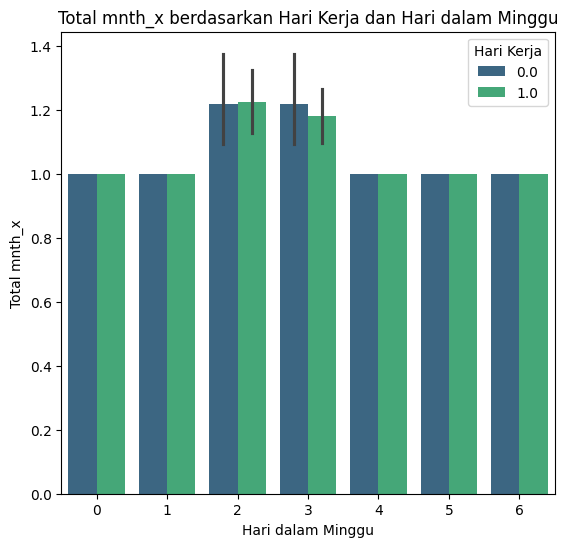

In [40]:
#Visualisasi data berdasarkan workingday_y dan weekday_x
plt.figure(figsize=(14, 6))

# Subplot untuk workingday_y
plt.subplot(1, 2, 1)
sns.barplot(x='weekday_x', y='mnth_x', hue='workingday_y', palette='viridis', data=all_df)
plt.title('Total mnth_x berdasarkan Hari Kerja dan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Total mnth_x')
plt.legend(title='Hari Kerja')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


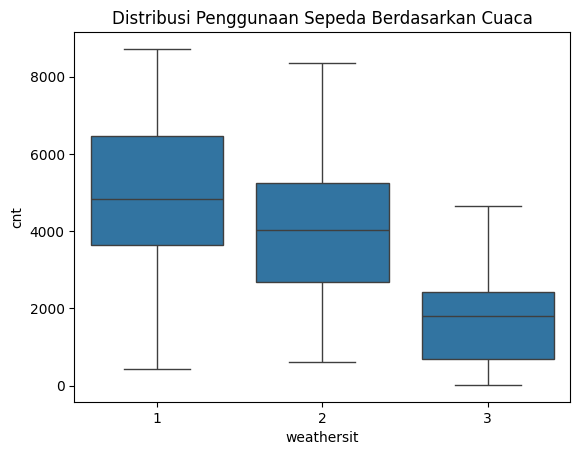

In [26]:
#Bagaimana distribusi sepeda berdasarkan cuaca terhadap membership/cnt?
# Membuat visualisasi distribusi sepeda berdasarkan cuaca
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Cuaca')
plt.show()

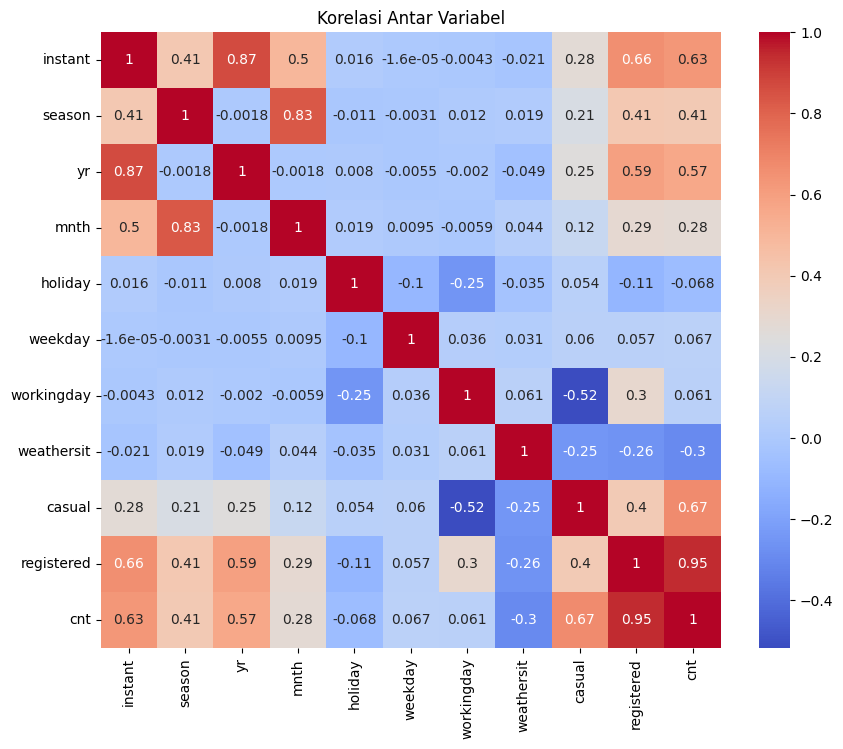

In [27]:
#Pertanyaan Bisnis 3
#Bagaimana pengaruh variabel temperatur dan musim terhadap jumlah penyewaan sepeda, dan bagaimana kita bisa mengoptimalkan layanan berdasarkan faktor-faktor ini?
#Visualisasi
numeric_cols = day_df.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

In [41]:
!pip install streamlit
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
st.header('Bike Sharing Dashboard')
day_df = pd.read_csv('day.csv', on_bad_lines='skip')

# Menampilkan tabel data
st.write('Data Bike Sharing', day_df)

# Menampilkan visualisasi
st.line_chart(day_df['cnt'])

Writing app.py


In [43]:
day_df['usage_bin'] = pd.cut(day_df['cnt'], bins=5, labels=["Low", "Medium", "High", "Very High", "Extreme"])

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.75.67:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://hot-hands-cheer.loca.lt
2024-10-03 05:41:17.558 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 3, in <module>
    day_df = pd.read_csv('day.csv', on_bad_lines='skip')
NameError: name 'pd' is not defined
